# Data Analysis

Here we analyze the data we have gained in the previous medidas (1,2,3).

In [2]:
import os

#Listado de colores para que el texto salga bonito por pantalla.
Red = '\033[91m'
Green = '\033[92m'
Blue = '\033[94m'
Cyan = '\033[96m'
White = '\033[97m'
Yellow = '\033[93m'
Magenta = '\033[95m'
Grey = '\033[90m'
Black = '\033[90m'
Default = '\033[99m'

# paths to data directories. 
path_1 = 'log_files/medida_1'
path_2 = 'log_files/medida_2'
path_3 = 'log_files/medida_3'

if not os.path.exists(path_1):
    print(Yellow + 'Could not find path to medida 1 data')
if not os.path.exists(path_2):
    print(Yellow + 'Could not find path to medida 2 data')
if not os.path.exists(path_3):
    print(Yellow + 'Could not find path to medida 3 data')


### Medida 1 data
Would like to plot diagram with distribution of global mean and max over hours and days.

In [3]:
# plot graphs for difference between laborales y fin de semana
import json
import numpy as np
import matplotlib.pyplot as plt

# Load files from folders
files = os.listdir(path_1)

# Store means, peaks and stdevs for each hour, laboural days
means_1 = {}
peaks_1 = {}
stdev_1 = {}

# Lists of all means sampled during week and weekend
allMeans = {}
allMeansWe = {}


for fn in files:
    #print(Grey+fn)
    splitted_fn = fn.split(' ')
    #print(splitted_fn)
    fn_type = splitted_fn[0]
    fn_day = splitted_fn[1]
    fn_date = splitted_fn[2]
    fn_hour = splitted_fn[3]

    # Store means relative to certain day and hour
    if fn_type == 'type_2' and fn_day in ['Wed', 'Thu']:
        with open(path_1+'/'+fn, 'r') as f:
            data = json.load(f)
        print(White+fn)

        hour = fn_hour[:2]
        print(Grey+f'Hour: {hour}')
        
        means = [m['mean'] for m in data]
        allMeans[hour] = means
        global_mean = round(np.mean(means),2)
        means_1[hour] = global_mean
        print(Cyan+f'Mean: {global_mean}')

        peaks = [p['max'] for p in data]
        print(Magenta+f'Peak: {max(peaks)}')
        peaks_1[hour] = max(peaks)

        stdev = round(np.std(peaks),2)
        print(Yellow+f'Stdev (calculated along peak values): {stdev}')
        stdev_1[hour] = stdev

    if fn_type == 'type_2' and fn_day in ['Sat', 'Sun']:
        with open(path_1+'/'+fn, 'r') as f:
            data = json.load(f)
        print(White+fn)

        hour = fn_hour[:2]
        print(Grey+f'Hour: {hour}')
        
        means_we = [m['mean'] for m in data]
        allMeansWe[hour] = means_we
        
    

type_2 Sat 2025-03-29 16h49m59s.json
Hour: 16
type_2 Sat 2025-03-29 18h06m54s.json
Hour: 18
type_2 Sat 2025-03-29 21h04m01s.json
Hour: 21
type_2 Sun 2025-03-30 00h00m00s.json
Hour: 00
type_2 Sun 2025-03-30 03h09m39s.json
Hour: 03
type_2 Sun 2025-03-30 12h38m24s.json
Hour: 12
type_2 Thu 2025-03-27 00h56m44s.json
Hour: 00
Mean: 37.13
Peak: 49.2
Stdev (calculated along peak values): 1.4
type_2 Thu 2025-03-27 03h44m41s.json
Hour: 03
Mean: 33.2
Peak: 36.1
Stdev (calculated along peak values): 0.33
type_2 Wed 2025-03-26 12h27m28s.json
Hour: 12
Mean: 34.84
Peak: 48.8
Stdev (calculated along peak values): 2.08
type_2 Wed 2025-03-26 16h42m51s.json
Hour: 16
Mean: 39.95
Peak: 50.2
Stdev (calculated along peak values): 1.01
type_2 Wed 2025-03-26 18h43m49s.json
Hour: 18
Mean: 41.94
Peak: 55.4
Stdev (calculated along peak values): 1.13
type_2 Wed 2025-03-26 21h20m46s.json
Hour: 21
Mean: 35.13
Peak: 45.7
Stdev (calculated along peak values): 1.32


### Differences between laboural and weekend days
Differences of means between laboural and weekend days, in the same hour spot, closed window

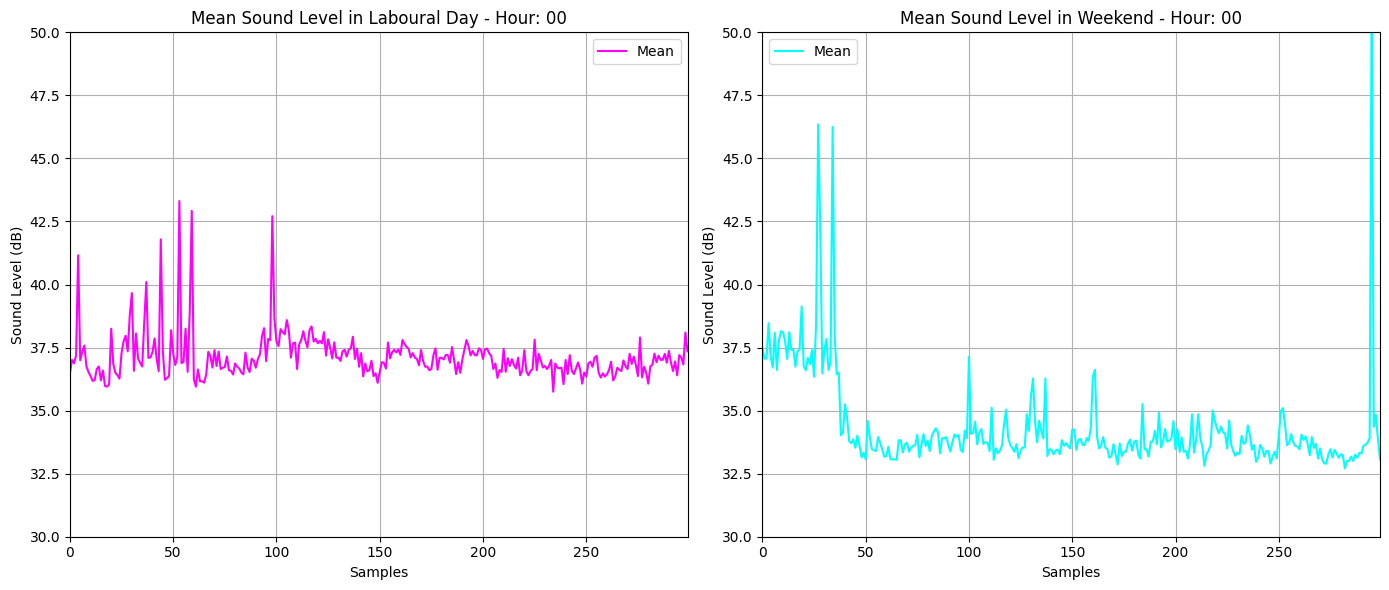

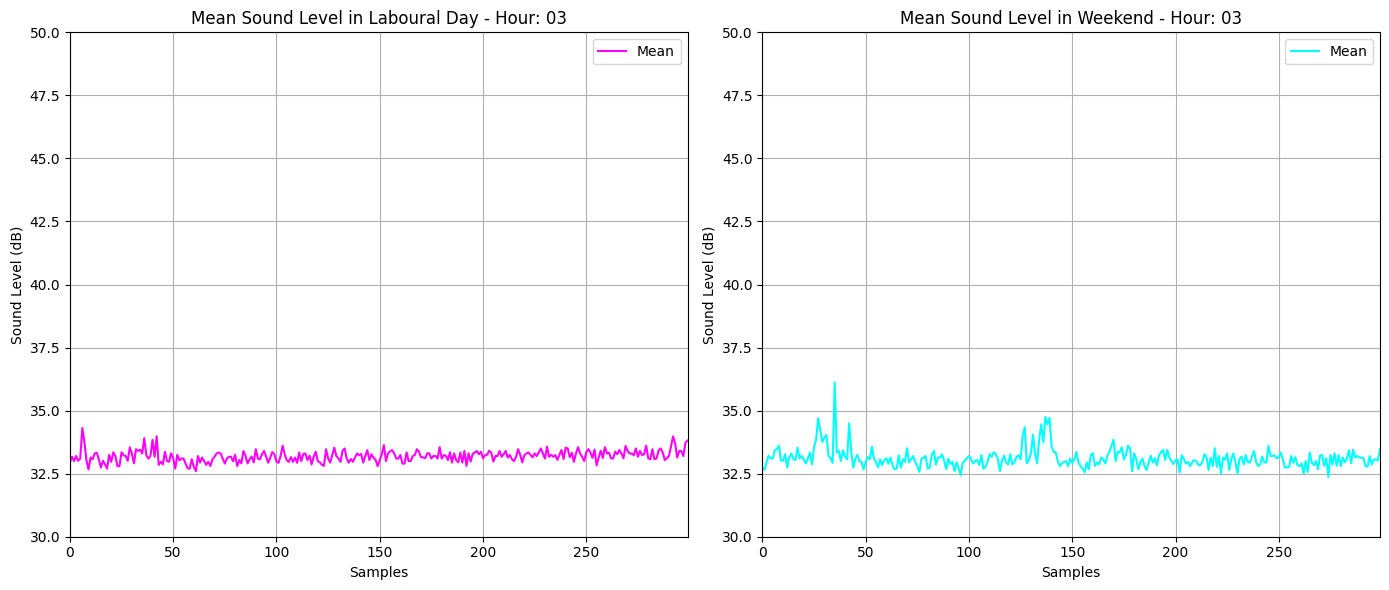

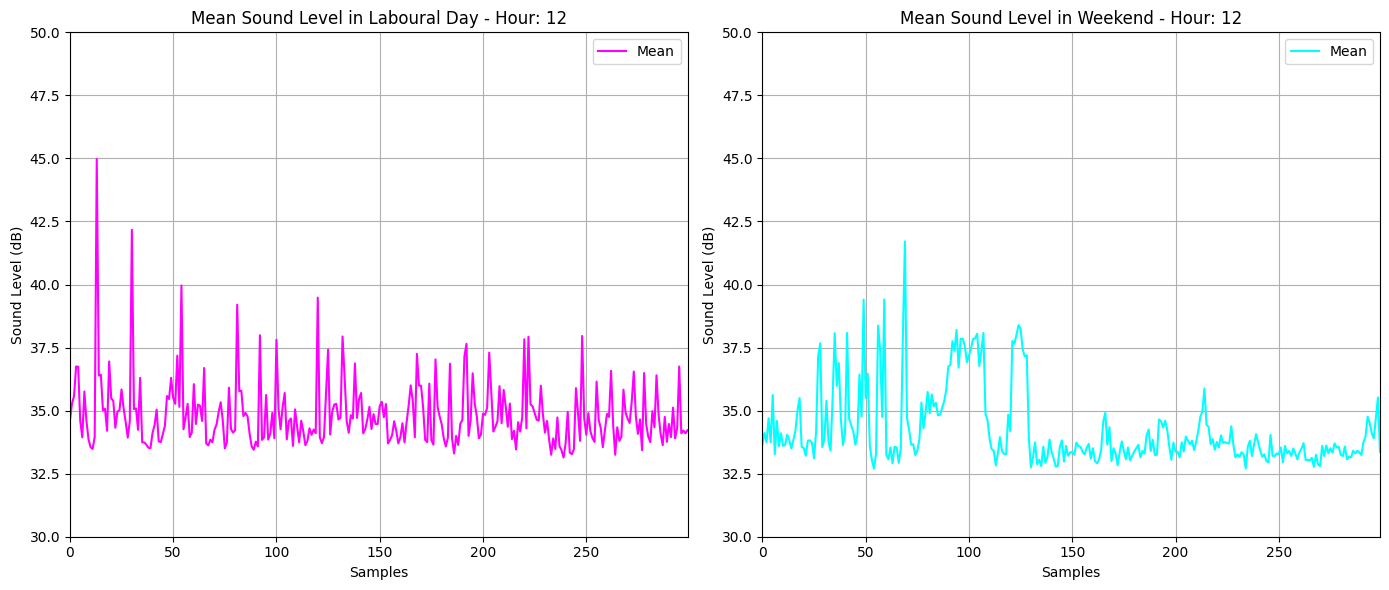

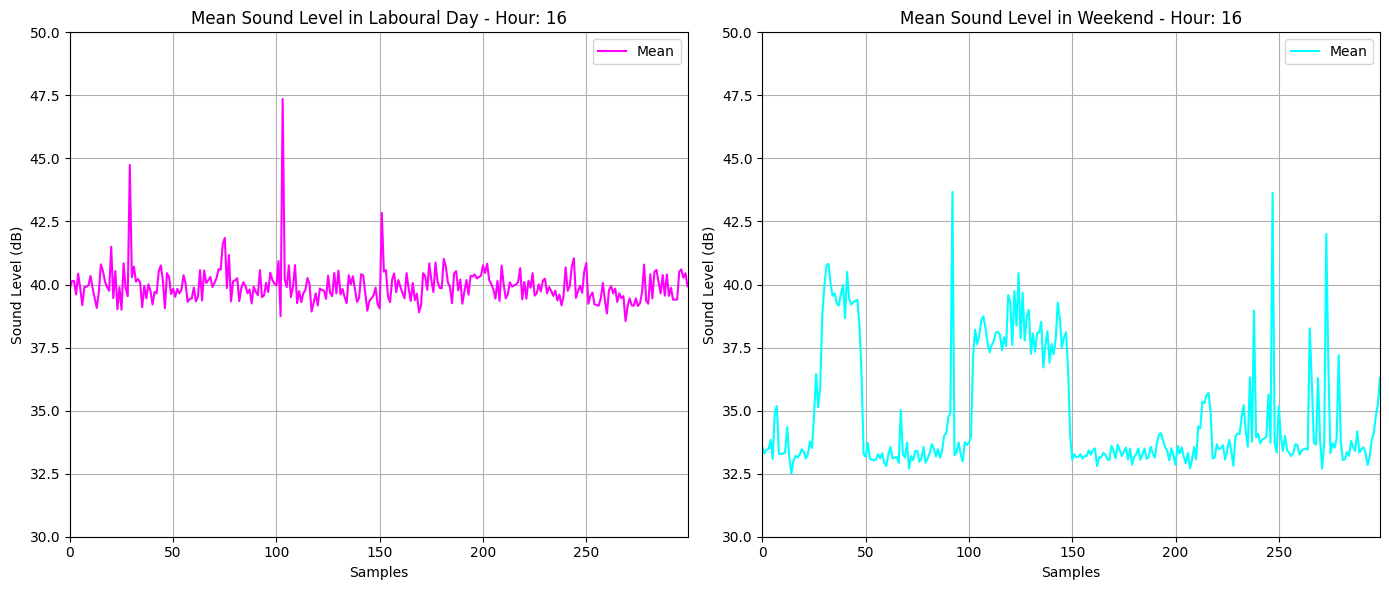

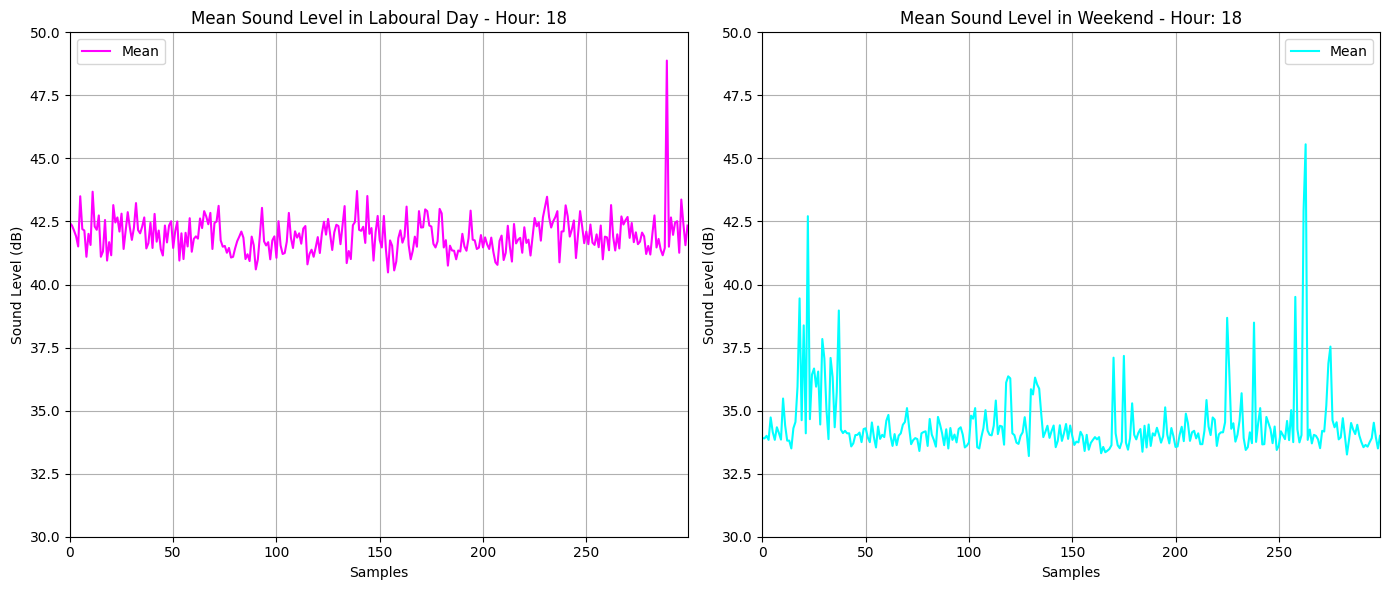

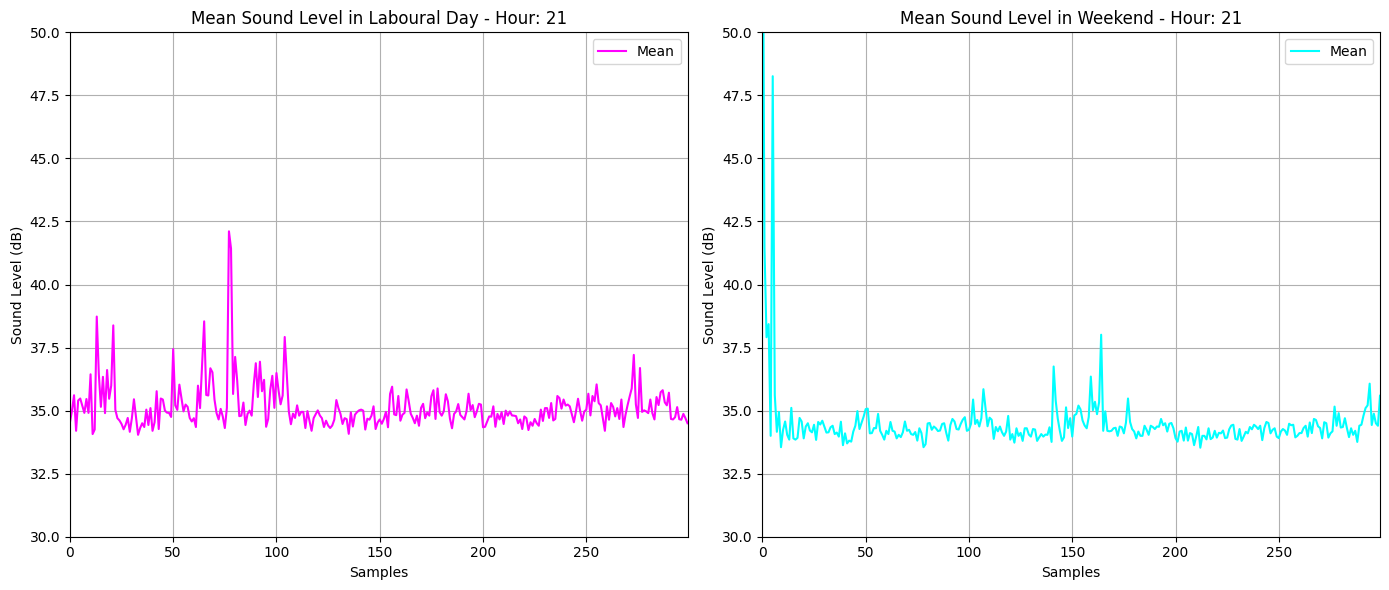

In [4]:
for k in allMeans.keys():
    means = allMeans[k]
    m_number = list(range(0,len(means)))

    # Creazione della figura con 2 subfigure (side-by-side)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Primo grafico
    axs[0].plot(m_number, means, label="Mean", color="magenta")
    axs[0].set_xlim(0, len(m_number)-1)
    axs[0].set_ylim(30, 50)
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Sound Level (dB)")
    axs[0].set_title(f'Mean Sound Level in Laboural Day - Hour: {k}')
    axs[0].grid(True)
    axs[0].legend()

    # Secondo grafico
    means_we = allMeansWe[k]
    m_number = list(range(0,len(means_we)))

    # Secondo grafico (puoi cambiare questo grafico per qualcosa di diverso, se necessario)
    axs[1].plot(m_number, means_we, label="Mean", color="cyan")
    axs[1].set_xlim(0, len(m_number)-1)
    axs[1].set_ylim(30, 50)
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Sound Level (dB)")
    axs[1].set_title(f'Mean Sound Level in Weekend - Hour: {k}')
    axs[1].grid(True)
    axs[1].legend()

    # Mostra la figura
    plt.tight_layout()  # Organizza bene gli spazi
    plt.show()



### Medida 2 data
Would like to plot diagram with distribution of global mean and max over hours and days.

In [5]:
# Load files from folders
files = os.listdir(path_2)

# Lists to store data
means_2 = {}
peaks_2 = {}
stdev_2 = {}

for fn in files:
    #print(Grey+fn)
    splitted_fn = fn.split(' ')
    #print(splitted_fn)
    fn_type = splitted_fn[0]
    fn_day = splitted_fn[1]
    fn_date = splitted_fn[2]
    fn_hour = splitted_fn[3]

    # Store means relative to certain day and hour
    if fn_type == 'type_2' and fn_day in ['Wed', 'Thu']:
        with open(path_2+'/'+fn, 'r') as f:
            data = json.load(f)
        print(White+fn)

        hour = fn_hour[:2]
        print(Grey+f'Hour: {hour}')

        means = [m['mean'] for m in data]
        global_mean = round(np.mean(means),2)
        means_2[hour] = global_mean
        print(Cyan+f'Mean: {global_mean}')

        peaks = [p['max'] for p in data]
        print(Magenta+f'Peak: {max(peaks)}')
        peaks_2[hour] = max(peaks)

        stdev = round(np.std(peaks),2)
        print(Yellow+f'Stdev (calculated along peak values): {stdev}')
        stdev_2[hour] = stdev

type_2 Thu 2025-03-27 00h08m52s.json
Hour: 00
Mean: 39.51
Peak: 49.4
Stdev (calculated along peak values): 1.69
type_2 Thu 2025-03-27 03h51m45s.json
Hour: 03
Mean: 33.85
Peak: 38.3
Stdev (calculated along peak values): 0.45
type_2 Wed 2025-03-26 12h07m22s.json
Hour: 12
Mean: 41.49
Peak: 55.6
Stdev (calculated along peak values): 3.65
type_2 Wed 2025-03-26 16h50m45s.json
Hour: 16
Mean: 42.98
Peak: 58.3
Stdev (calculated along peak values): 1.87
type_2 Wed 2025-03-26 18h36m30s.json
Hour: 18
Mean: 44.38
Peak: 55.3
Stdev (calculated along peak values): 1.84
type_2 Wed 2025-03-26 21h30m47s.json
Hour: 21
Mean: 40.78
Peak: 50.9
Stdev (calculated along peak values): 3.14


### Differences between closed and open window
Differences between closed and open window elaborated using laboural days medidas. Comparison with peaks, means and stdevs.

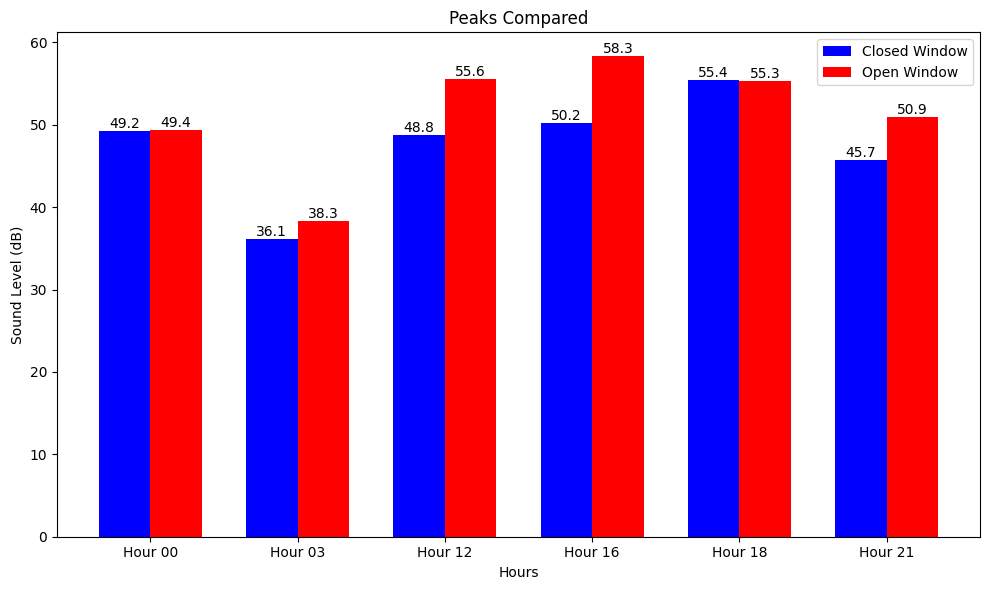

In [6]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Number of paired elements
n = len(peaks_1)
x = np.arange(n)  # the label locations
width = 0.35  # width of the bars

# Create bars
bars1 = plt.bar(x - width/2, peaks_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, peaks_2.values(), width, label='Open Window', color='red')

# Add labels, title and custom x-axis tick labels
plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Peaks Compared')
plt.xticks(x, [f'Hour {i}' for i in peaks_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

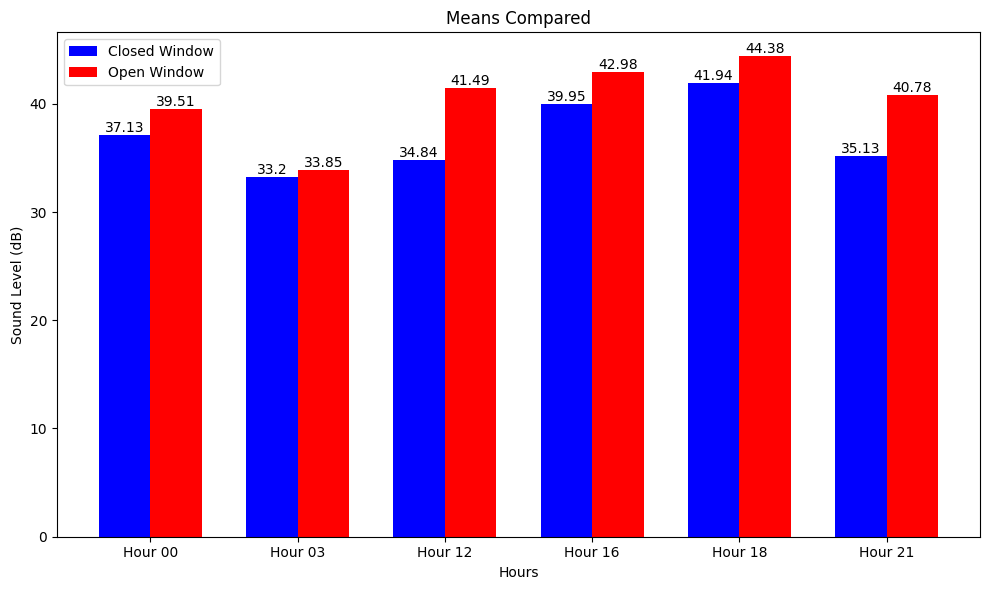

In [7]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Number of paired elements
n = len(peaks_1)
x = np.arange(n)  # the label locations
width = 0.35  # width of the bars

# Create bars
bars1 = plt.bar(x - width/2, means_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, means_2.values(), width, label='Open Window', color='red')

# Add labels, title and custom x-axis tick labels
plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Means Compared')
plt.xticks(x, [f'Hour {i}' for i in means_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

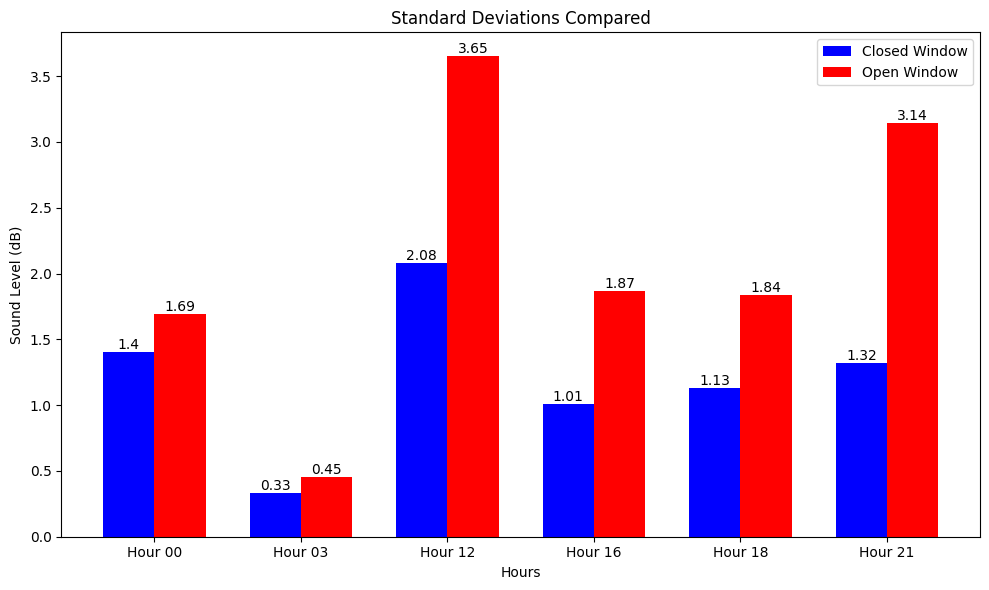

In [8]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Number of paired elements
n = len(peaks_1)
x = np.arange(n)  # the label locations
width = 0.35  # width of the bars

# Create bars
bars1 = plt.bar(x - width/2, stdev_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, stdev_2.values(), width, label='Open Window', color='red')

# Add labels, title and custom x-axis tick labels
plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Standard Deviations Compared')
plt.xticks(x, [f'Hour {i}' for i in means_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()